Installing Fastbook API

In [1]:

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.1MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 1.2MB 17.0MB/s 
     |████████████████████████████████| 194kB 38.9MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

**Image Classification using cnn_learner**

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [ ]:
#Function to identify if image is dog. Returns Boolean value
def is_dog(x)->bool: 
  return x[0].islower()

In [ ]:
#filename obtained from function get_image_files(path)
dataloaders = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))

In [ ]:
#Model Implementation
learn_classification = cnn_learner(dataloaders, resnet34, metrics=error_rate)
learn_classification.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.142668,0.014068,0.005413,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.060794,0.007383,0.002706,00:57


In [ ]:
#Creating a widget to upload an image of cat or dog
image_uploader = widgets.FileUpload()
image_uploader

FileUpload(value={}, description='Upload')

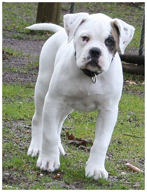

In [ ]:
#Uploaded an image of a bull dog
test_image_dog = PILImage.create(image_uploader.data[0])
test_image_dog.to_thumb(192)

In [ ]:
is_dog,_,probs = learn_classification.predict(test_image_dog)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 0.999985


In [ ]:
#uploaded an image of a cat
image_uploader

FileUpload(value={'american_bulldog_129.jpg': {'metadata': {'lastModified': 1611870376000, 'type': 'image/jpeg…

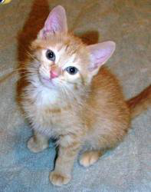

In [ ]:
# uploaded an image of a cat
test_image_cat = PILImage.create(image_uploader.data[0])
test_image_cat.to_thumb(192)

In [ ]:
is_dog,_,probs = learn_classification.predict(test_image_cat)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: False.
Probability it's a dog: 0.000000


**Segmentation using unet_learner**

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
segmentation_dataloader = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

segmentation_learn = unet_learner(segmentation_dataloader, resnet34)
segmentation_learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.314667,2.766212,00:01


epoch,train_loss,valid_loss,time
0,1.887390,1.624688,00:01
1,1.617373,1.331762,00:01
2,1.499560,1.228015,00:01
3,1.344142,1.016490,00:01
4,1.251698,1.071842,00:01
5,1.145293,0.888222,00:01
6,1.050901,0.843368,00:01
7,0.975299,0.844876,00:01


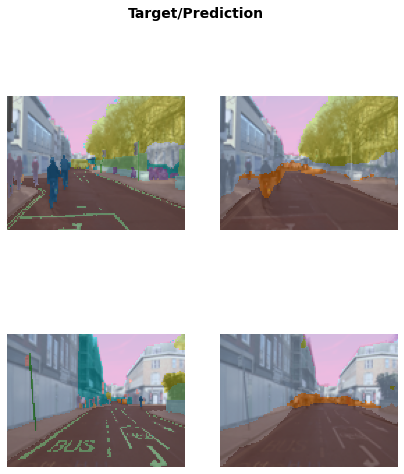

In [ ]:
segmentation_learn.show_results(max_n=4, figsize=(7,8))

**Sentiment analysis using text_classifer_learner**

In [ ]:
from fastai.text.all import *

In [ ]:
text_dataloaders = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
nlp_learn = text_classifier_learner(text_dataloaders, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
nlp_learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.461331,0.389761,0.827440,04:02


epoch,train_loss,valid_loss,accuracy,time
0,0.314950,0.233751,0.908840,07:45
1,0.242248,0.221197,0.913000,07:46
2,0.193791,0.183273,0.928840,07:45
3,0.146660,0.190295,0.930240,07:45


In [ ]:
nlp_learn.predict("I hated the movie")

('neg', tensor(0), tensor([0.8641, 0.1359]))

"I hated the movie" gives a negetive reaction. 

In [ ]:
nlp_learn.predict("the movie was not good")

('neg', tensor(0), tensor([0.9434, 0.0566]))

In [ ]:
nlp_learn.predict("the movie was beautiful")

('pos', tensor(1), tensor([0.1248, 0.8752]))

In [ ]:
nlp_learn.predict("the movie was a blast")

('pos', tensor(1), tensor([0.0555, 0.9445]))

In [ ]:
nlp_learn.predict("Lackluster!")

('neg', tensor(0), tensor([0.9940, 0.0060]))

**Tabular_learner for decisiontree**

In [3]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

tabular_dataloaders = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

tabular_learn = tabular_learner(tabular_dataloaders, metrics=accuracy)
tabular_learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.361275,0.365533,0.835227,00:04
1,0.348757,0.350311,0.840295,00:04
2,0.344826,0.348132,0.838759,00:04


**Collab_learner for ranking - Recommendation system**

In [4]:
from fastai.collab import *

In [5]:
path = untar_data(URLs.ML_SAMPLE)
colab_dataloaders = CollabDataLoaders.from_csv(path/'ratings.csv')
colab_learn = collab_learner(colab_dataloaders, y_range=(0.5,5.5))
colab_learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.497563,1.419108,00:00


epoch,train_loss,valid_loss,time
0,1.348368,1.360463,00:00
1,1.248621,1.178440,00:00
2,1.010771,0.876555,00:00
3,0.791824,0.746206,00:00
4,0.690008,0.717330,00:00
5,0.641033,0.709639,00:00
6,0.629534,0.706519,00:00
7,0.610997,0.704522,00:00
8,0.603987,0.703974,00:00
9,0.603293,0.703902,00:00


In [10]:
colab_learn.show_results()

,userId,movieId,rating,rating_pred
0,33.0,8.0,4.0,3.880128
1,13.0,46.0,2.0,3.447791
2,63.0,4.0,1.0,2.907547
3,14.0,49.0,4.0,3.612133
4,24.0,85.0,4.0,3.510460
5,82.0,9.0,3.0,3.887768
6,82.0,67.0,4.0,3.947498
7,15.0,16.0,4.5,4.441749
8,17.0,6.0,5.0,4.450169
